In [2]:
# Import all the necessary packages
import numpy as np
import nibabel as nib    # Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
## Install missing package
!pip install -r requirements.txt

## Load data and inspect data dimensions

In [4]:
# Define the image path and load the data
image_path = "./data/images/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


Nifti 1  Format: https://nifti.nimh.nih.gov/nifti-1

In [5]:
# Header
print(image_obj.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4 240 240 155   4   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        : np.bytes_(b'none')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z 

In [6]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [7]:
image_data.shape

(240, 240, 155, 4)

In [8]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The image object has the following dimensions: height: 240, width:240, depth:155, channels:4


## Explore the header, data, etc

In [9]:
?image_obj.header.from_header

Signature: image_obj.header.from_header(header=None, check=True)
Docstring:
Class method to create header from another header

Extend Analyze header copy by copying extensions from other Nifti
types.

Parameters
----------
header : ``Header`` instance or mapping
   a header of this class, or another class of header for
   conversion to this type
check : {True, False}
   whether to check header for integrity

Returns
-------
hdr : header instance
   fresh header instance of our own class
File:      ~/miniconda3/envs/bioe/lib/python3.12/site-packages/nibabel/nifti1.py
Type:      method

## Plot random image slices - execute same cell multiple times

Plotting Layer 94 Channel 2 of Image


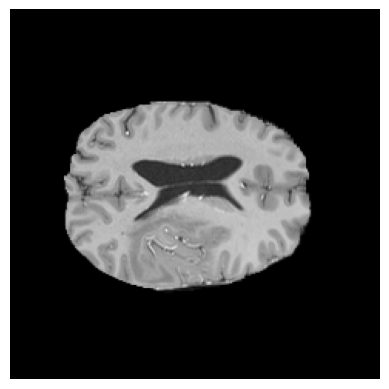

In [14]:
# Select random layer number (RUN SEVERAL TIMES)
maxval = 154
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 2
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

## Plot image slices - increasing layer numbers

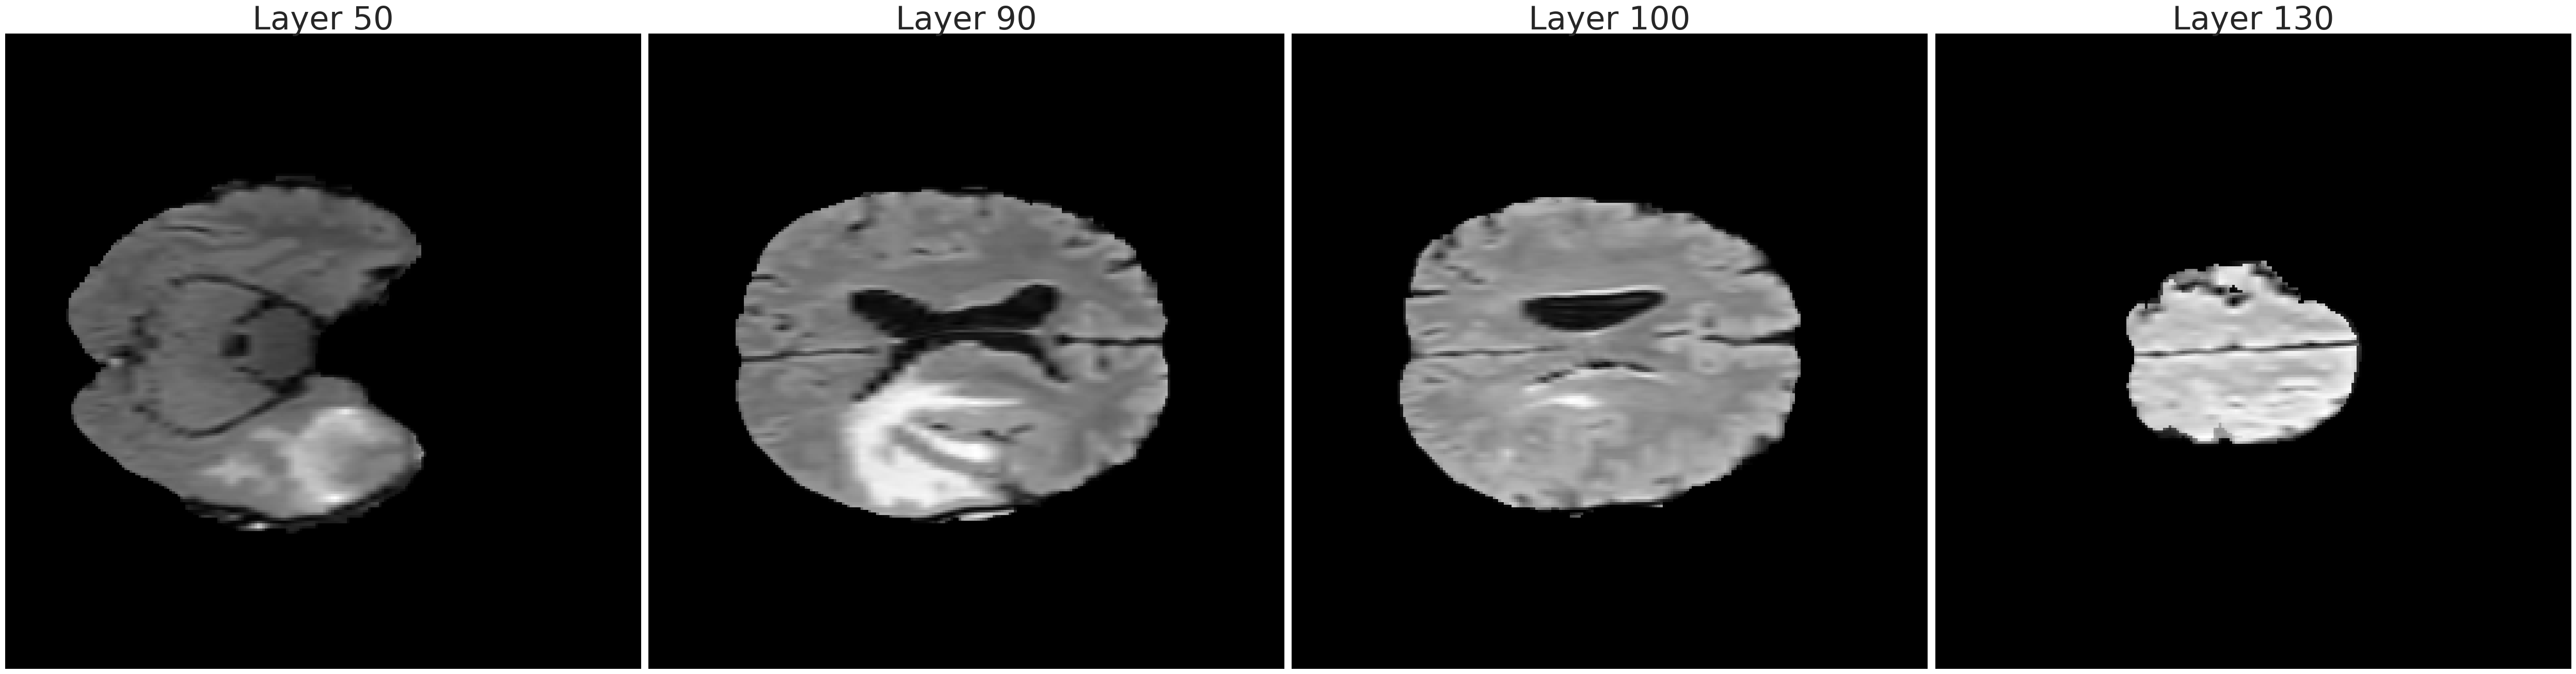

In [13]:
layer = [50, 90, 100, 130]

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))

for i in range(4):
    ax[i].imshow(image_data[:, :, layer[i], 0], cmap='gray')
    ax[i].set_title(f"Layer {layer[i]}", fontsize=45)
    ax[i].axis('off')

plt.axis('off')
plt.tight_layout()

**Task** (See Below)

In [73]:
## ADD CODE TO GENERATE ANIMATION
# 1. Generate several pngs
# 2. in a different cell combine the pngs into a gif, you can use the python library Pillow (PIL)
# Define a channel to look at

from PIL import Image

# Save each layer as a separate PNG
for i in range(0,maxval):
    plt.figure(figsize=(10, 6))
    plt.imshow(image_data[:, :, i, 0], cmap='gray')
    plt.title(f"Plotting Layer {i}", fontsize=15)
    plt.axis('off')
    plt.savefig(f'Task1/layer_{i}.png', bbox_inches='tight', pad_inches=0)
    plt.close()
print("Done")

Done


In [74]:
image_files = [f'Task1/layer_{i}.png' for i in range(maxval)]
images = [Image.open(image) for image in image_files]
images[0].save('combined_layers.gif', save_all=True, append_images=images[1:], loop=0, duration=50)
print("Done")

Done


## It should be similar to this animation

In [57]:
from IPython.display import Image
Image(url='animation_example.gif')

In [75]:
## Use this cell for the animation
# tip: use PIL
# I used something like this
#with Image.open(filepaths[0]) as img:
#    img.save('animation.gif', save_all=True, append_images=[Image.open(fp) for fp in filepaths[1:]], duration=80, loop=0)
from IPython.display import Image
Image(url='combined_layers.gif')

## Load labels for the same MRI data

In [76]:
# Define the data path and load the data
label_path = "./data/labels/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [77]:
# Extract data labels
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [78]:
# Extract and print out the shape of the labels data
height, width, depth = label_array.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_array)}')
print("""Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")

Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


## Visualize single layer with corresponding labels

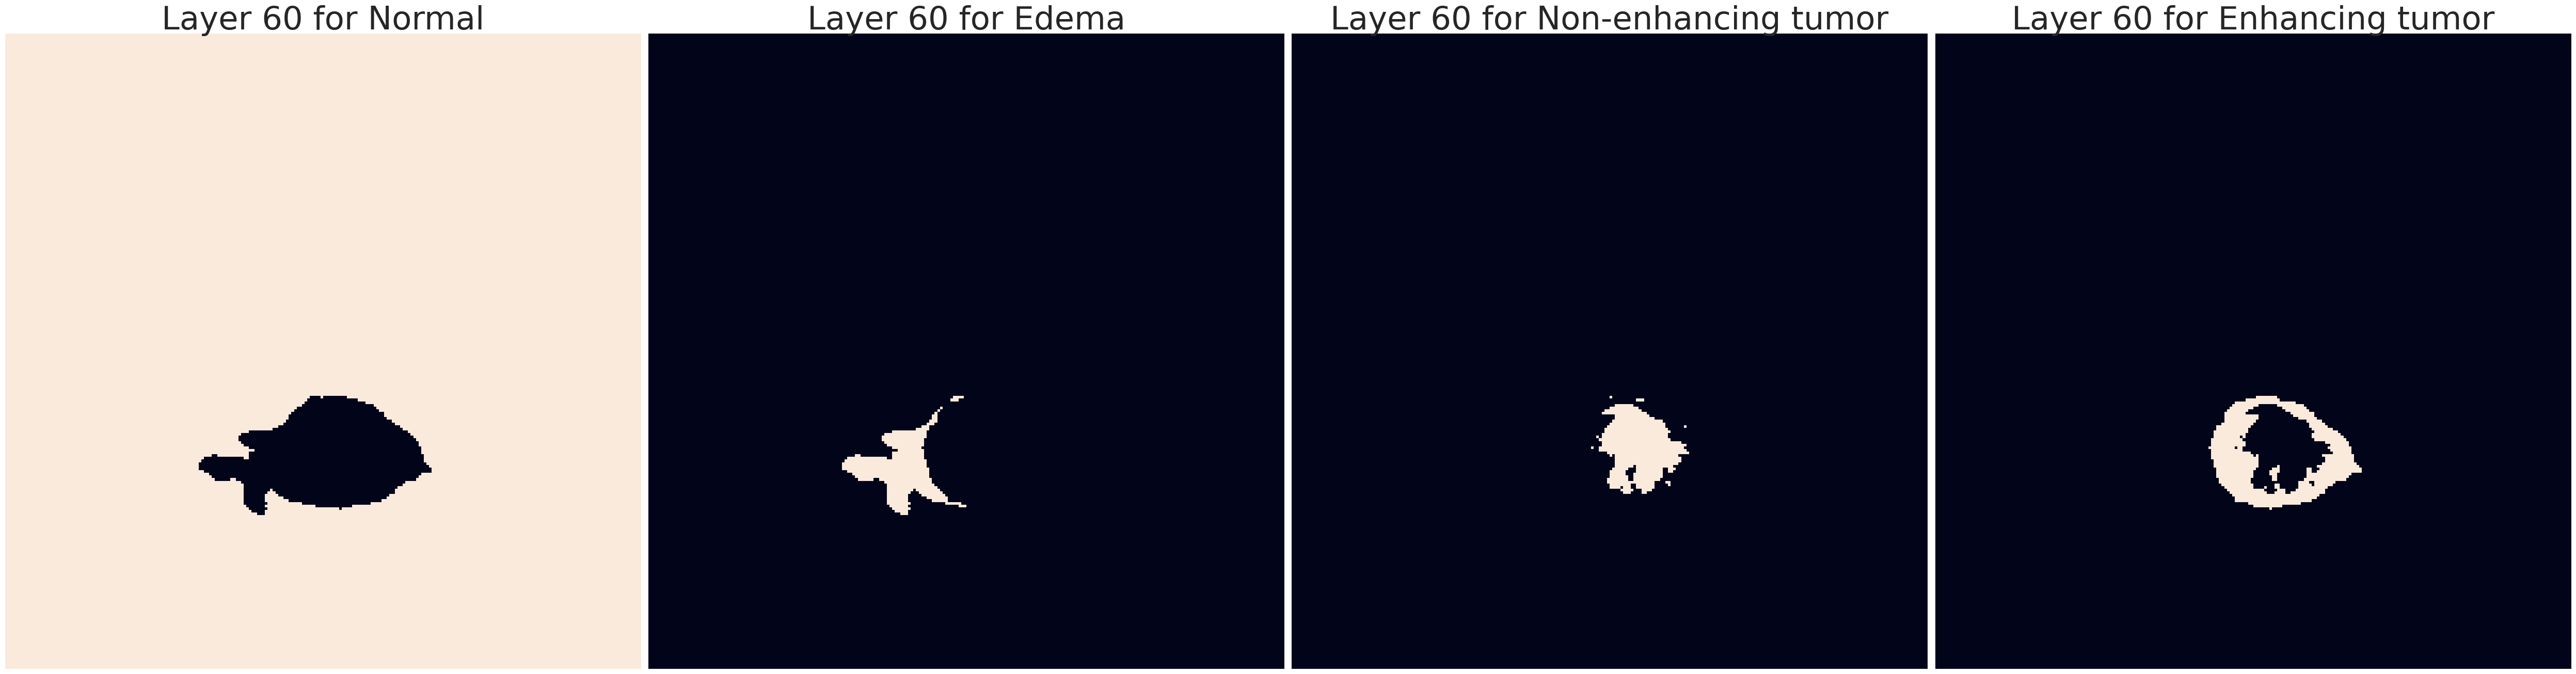

In [79]:
# Define a single layer for plotting
layer = 60

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

## Combine the 4 binary masks into a single 4-color segmented image

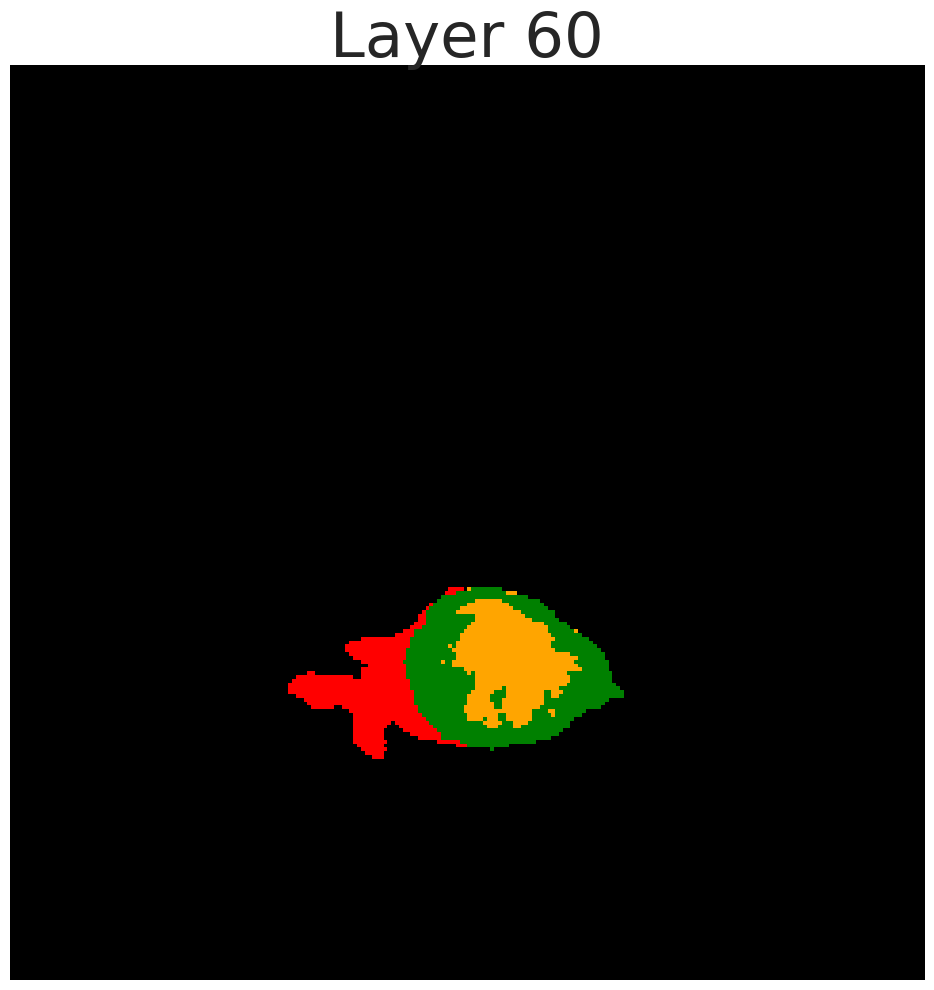

In [80]:
# Define a single layer for plotting
layer = 60

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
from matplotlib.colors import ListedColormap
# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={
    0: "black",
    1: "red",
    2: "orange",
    3: "green"
}
# We create a colormar from our list of colors
cmap = ListedColormap([col_dict[x] for x in col_dict.keys()])

# isolate labels for chosen layer
layer_labels = label_array[:,:,layer]

# plot image
im = ax.imshow(layer_labels, cmap=cmap)
ax.set_title(f"Layer {layer}", fontsize=45)
ax.axis('off')
plt.tight_layout()

## Visualize 4-color segmented image over multiple layers 

**Task** (See Below)

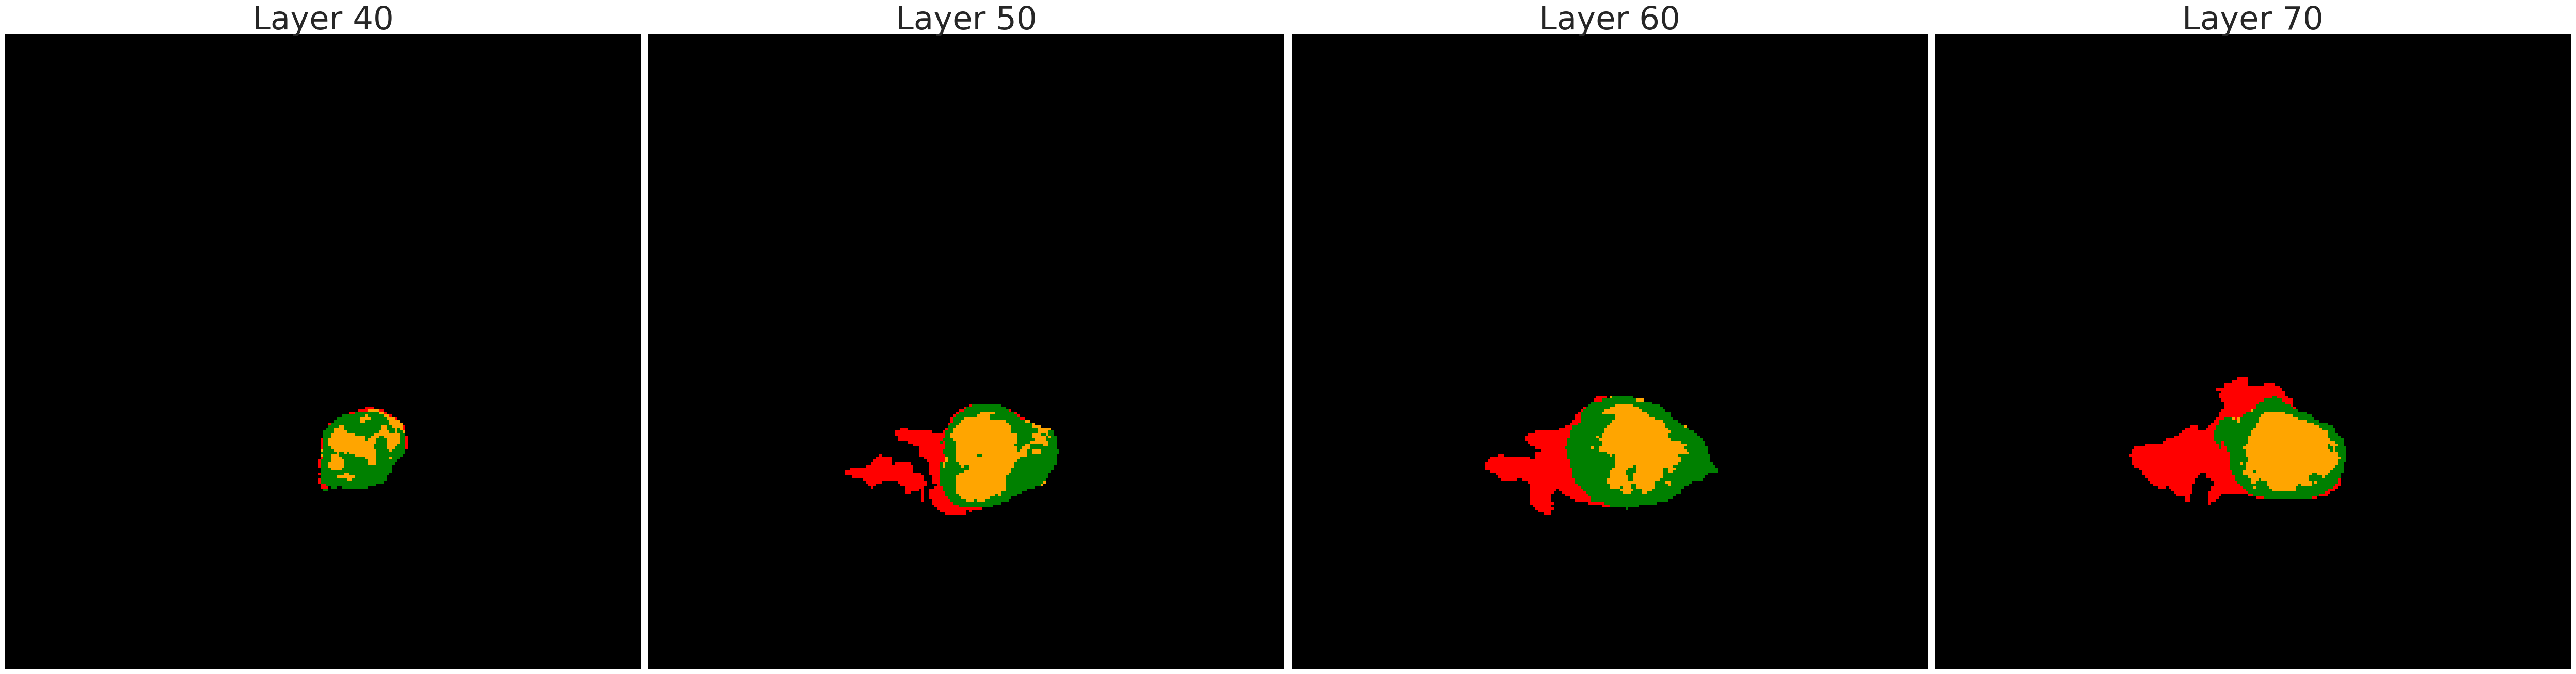

In [83]:
layer = [40, 50, 60, 70]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))

# write code here to make a 1x4 panel plot

for i in range(0,len(layer)):
    layer_labels = label_array[:,:,layer[i]]
    im = ax[i].imshow(layer_labels, cmap=cmap)
    ax[i].set_title(f"Layer {layer[i]}", fontsize=45)
    ax[i].axis('off')

plt.tight_layout()

In [23]:
## Done!